In [1]:
!which python3

/home/vahagnd/projects/portfolio-optimization/.venv/bin/python3


# Importing all

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv("new_data/close_adjusted_17.csv")

In [7]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.set_index("date", inplace=True)

In [11]:
df

,JBHT,AEP,DE,NOV,PEP,COTY,RRC,PFE,REGN,BSX,...,KEY,ETR,LLY,PXD,ATVI,CA,FLR,LNC,MRO,OI
date,,,,,,,,,,,,,,,,,,,,,
2006-01-04,18.7339,18.6855,24.1011,26.0680,36.5939,NaN,26.6190,11.5813,15.9200,25.31,...,19.9905,34.6440,32.5362,42.0003,6.2547,28.3200,31.9857,36.6269,14.2195,21.0914
2006-01-05,18.6843,18.5803,24.1400,25.3476,36.3795,NaN,25.6293,11.5955,16.4500,25.87,...,20.0849,34.4368,32.7129,41.0324,6.3079,28.3700,31.8953,36.7764,14.1722,21.2680
2006-01-06,18.6595,18.8708,24.2214,26.3666,36.5143,NaN,25.8627,11.7229,17.0000,26.24,...,20.0908,34.8216,32.9580,41.5866,6.6004,28.6400,32.3308,37.1597,14.3465,21.3167
2006-01-09,18.7753,18.5903,24.3630,26.0792,36.3305,NaN,25.7974,11.7229,17.1301,25.88,...,20.1144,34.6539,33.3912,41.5242,6.5384,29.0400,32.5362,37.0433,14.6197,21.5326
2006-01-10,18.7587,18.5953,24.3736,26.7063,36.2080,NaN,26.4510,11.5294,16.7200,26.48,...,20.0082,34.7476,33.1632,41.5632,6.5561,28.7500,33.1648,37.2555,14.9509,21.4345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,132.5544,105.7566,464.5100,12.0561,133.8414,5.04,33.7840,22.3536,598.8752,101.14,...,14.6752,84.3585,857.9713,NaN,NaN,24.2009,35.6000,31.9100,NaN,11.9300
2025-04-28,130.5309,106.1135,460.2000,11.9584,132.3082,4.98,35.1709,22.6185,609.9589,102.18,...,14.6752,84.4776,875.4954,NaN,NaN,24.2705,35.0200,32.0500,NaN,11.9700
2025-04-29,129.9827,107.5407,460.6400,11.7239,132.8523,5.02,35.0213,23.3447,568.0707,102.74,...,14.7443,82.9288,883.3893,NaN,NaN,24.2606,35.0700,32.5900,NaN,12.1500


# Magnificent Seven messed up

In [13]:
df_mag7 = df[['GOOGL', 'AMZN', 'AAPL', 'AVGO', 'META', 'MSFT', 'NVDA']]

In [108]:
df_mag7

,GOOGL,AMZN,AAPL,AVGO,META,MSFT,NVDA
date,,,,,,,
2006-01-04,11.1418,2.3625,2.2758,NaN,NaN,19.1693,3.0037
2006-01-05,11.2919,2.3825,2.2578,NaN,NaN,19.1835,3.0718
2006-01-06,11.6528,2.3935,2.3161,NaN,NaN,19.1267,3.1222
2006-01-09,11.6838,2.3540,2.3086,NaN,NaN,19.0911,3.2094
2006-01-10,11.7554,2.2826,2.4546,NaN,NaN,19.1906,3.2101
...,...,...,...,...,...,...,...
2025-04-24,159.0874,186.5400,208.0971,188.15,533.15,386.5903,106.4226
2025-04-28,160.4158,187.7000,209.8648,192.47,549.74,390.4432,108.7225
2025-04-29,159.9664,187.3900,210.9334,191.17,554.44,393.3179,109.0124


In [14]:
df_mag7.loc[:].isna().sum()

GOOGL       1
AMZN        0
AAPL        0
AVGO      905
META     1606
MSFT        0
NVDA        0
dtype: int64

In [16]:
for ticker in df_mag7.columns:
    print(f'{ticker} first valid index:', df_mag7[ticker].first_valid_index())
    print(f'{ticker} last valid index:', df_mag7[ticker].last_valid_index(), end='\n\n')
    # print(df[ticker].loc[df[ticker].first_valid_index():])

GOOGL first valid index: 2006-01-04 00:00:00
GOOGL last valid index: 2025-05-01 00:00:00

AMZN first valid index: 2006-01-04 00:00:00
AMZN last valid index: 2025-05-01 00:00:00

AAPL first valid index: 2006-01-04 00:00:00
AAPL last valid index: 2025-05-01 00:00:00

AVGO first valid index: 2009-08-06 00:00:00
AVGO last valid index: 2025-05-01 00:00:00

META first valid index: 2012-05-18 00:00:00
META last valid index: 2025-05-01 00:00:00

MSFT first valid index: 2006-01-04 00:00:00
MSFT last valid index: 2025-05-01 00:00:00

NVDA first valid index: 2006-01-04 00:00:00
NVDA last valid index: 2025-05-01 00:00:00



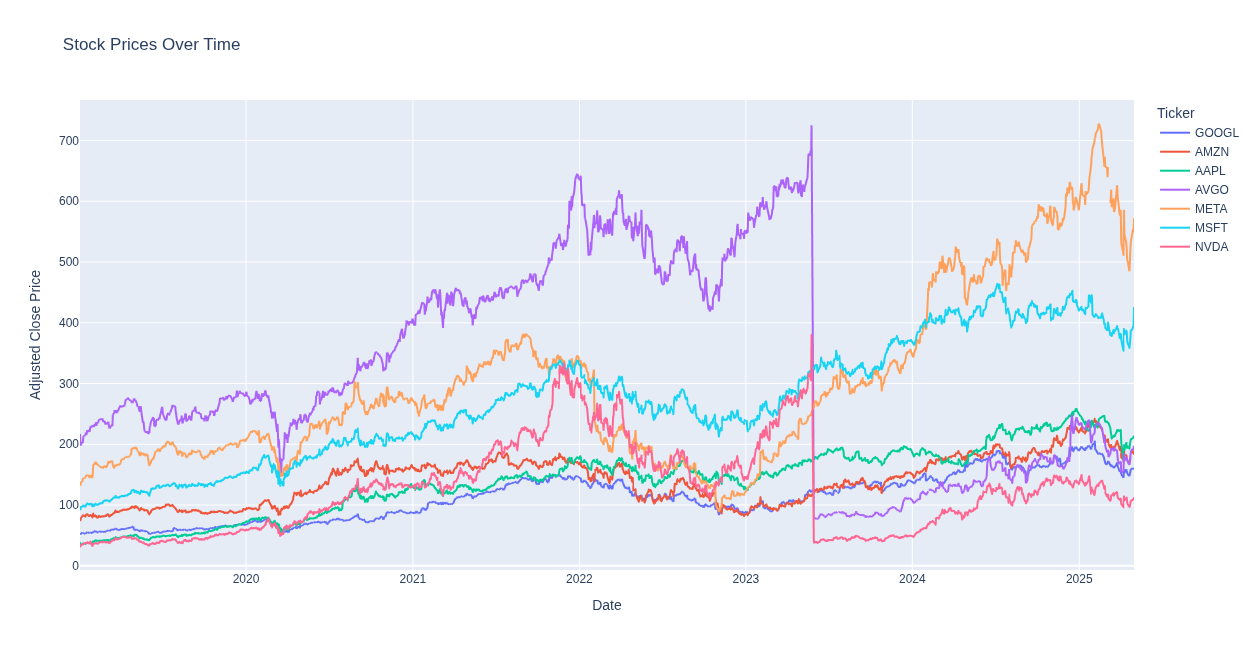

In [17]:
# Reset index so 'date' becomes a column
df_plot = df_mag7.loc['2019':].reset_index()

# Melt dataframe from wide to long format for Plotly express
df_melted = df_plot.melt(id_vars='date', value_vars=df_mag7.columns, 
                         var_name='Ticker', value_name='Price')

# Plot
fig = px.line(df_melted, x='date', y='Price', color='Ticker',
              title='Stock Prices Over Time',
              labels={'date': 'Date', 'Price': 'Adjusted Close Price'})

fig.update_layout(width=1200, height=650)  # width and height in pixels

fig.show()


# Clean mag7

In [159]:
df_raw = pd.read_csv("new_data/ohlc_adjusted_mag7_raw.csv")

In [160]:
# Step 2: Build proper MultiIndex for columns
features = df_raw.columns.values[1:]
tickers = df_raw.iloc[0].values[1:]
# Build MultiIndex: [(feature, ticker), ...]
multi_index = pd.MultiIndex.from_tuples(list(zip(features, tickers)))

# Step 3: Slice the actual data
df_clean = df_raw.iloc[2:].copy()
df_clean.columns = ['Date'] + list(multi_index)
df_clean.set_index('Date', inplace=True)
df_clean.index = pd.to_datetime(df_clean.index)

# Optional: convert all values to numeric (from strings)
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Final check
df_clean

,"(Close, AAPL)","(Close.1, AMZN)","(Close.2, AVGO)","(Close.3, GOOGL)","(Close.4, META)","(Close.5, MSFT)","(Close.6, NVDA)","(High, AAPL)","(High.1, AMZN)","(High.2, AVGO)",...,"(Open.4, META)","(Open.5, MSFT)","(Open.6, NVDA)","(Volume, AAPL)","(Volume.1, AMZN)","(Volume.2, AVGO)","(Volume.3, GOOGL)","(Volume.4, META)","(Volume.5, MSFT)","(Volume.6, NVDA)"
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-01,17.495451,11.502000,2.487817,15.035701,NaN,25.323069,0.303277,17.935143,11.648500,2.523192,...,NaN,25.354713,0.296400,610999200,135098000,11762000,80011908,NaN,43832300,408680000
2012-05-02,17.611147,11.512500,2.510920,15.106101,NaN,25.156946,0.294566,17.653824,11.572000,2.516695,...,NaN,25.196502,0.302131,427389200,91868000,8848000,64395540,NaN,37385300,684008000
2012-05-03,17.486120,11.472500,2.408403,15.199633,NaN,25.125292,0.289523,17.774040,11.626500,2.507309,...,NaN,25.220223,0.295254,390549600,81110000,18368000,74645280,NaN,31501300,419536000
2012-05-04,16.988131,11.199500,2.283507,14.850127,NaN,24.508238,0.281041,17.382141,11.486000,2.408403,...,NaN,24.880055,0.287689,529992400,91704000,38604000,88207704,NaN,57927200,545092000
2012-05-07,17.115259,11.258000,2.259683,15.113315,NaN,24.247175,0.285855,17.214138,11.343500,2.309497,...,NaN,24.286731,0.286084,460118400,66286000,19848000,79700220,NaN,48641400,604440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,201.449997,216.979996,244.279999,176.089996,694.059998,472.750000,142.620102,206.000000,217.850006,248.169998,...,698.460022,469.700012,143.180061,72862600,38102500,25334100,28935900,12773200.0,16469900,185114500
2025-06-10,202.669998,217.610001,244.630005,178.600006,702.400024,470.920013,143.950012,204.350006,217.690002,246.279999,...,701.349976,471.190002,142.680096,54672600,31303300,25491300,61766100,10850100.0,15375900,155881900
2025-06-11,198.779999,213.199997,252.910004,177.350006,694.140015,472.619995,142.830002,204.500000,218.399994,254.770004,...,703.710022,470.019989,144.610001,60989900,39326000,24599000,31646800,9582500.0,16399200,167694000


In [161]:
# Assume you already have df_clean and its columns are MultiIndex (feature, ticker)
df_clean.columns = pd.MultiIndex.from_tuples(df_clean.columns)

# Step 1: Normalize feature names by stripping trailing ".1", ".2", etc.
def strip_suffix(feature_name):
    return feature_name.split('.')[0]

new_columns = [(strip_suffix(feat), ticker) for feat, ticker in df_clean.columns]
df_clean.columns = pd.MultiIndex.from_tuples(new_columns)

# Step 2 (optional): Sort the index for clarity
df_clean = df_clean.sort_index(axis=1)

# Check cleaned structure
df_clean.loc['2012-05-18':]

Close                                                  \
                  AAPL        AMZN        AVGO       GOOGL        META   
Date                                                                     
2012-05-18   15.940141   10.692500    2.167274   14.935452   38.050667   
2012-05-21   16.868807   10.905500    2.231528   15.276500   33.870369   
2012-05-22   16.739283   10.766500    2.257518   14.945402   30.854582   
2012-05-23   17.147717   10.864000    2.419955   15.160828   31.849894   
2012-05-24   16.990232   10.762000    2.347039   15.016548   32.875061   
...                ...         ...         ...         ...         ...   
2025-06-09  201.449997  216.979996  244.279999  176.089996  694.059998   
2025-06-10  202.669998  217.610001  244.630005  178.600006  702.400024   
2025-06-11  198.779999  213.199997  252.910004  177.350006  694.140015   
2025-06-12  199.199997  213.240005  256.070007  175.699997  693.359985   
2025-06-13  196.449997  212.100006  248.699997  174.669998  682.869995   

                                          High                          ...  \
                  MSFT        NVDA        AAPL        AMZN        AVGO  ...   
Date                                                                    ...   
2012-05-18   23.307398    0.276915   16.331747   10.981500    2.183879  ...   
2012-05-21   23.689615    0.281729   16.876622   10.999000    2.231528  ...   
2012-05-22   23.697578    0.278290   17.247498   10.943500    2.268347  ...   
2012-05-23   23.179996    0.285168   17.215038   10.877500    2.425009  ...   
2012-05-24   23.148144    0.277603   17.326239   10.883000    2.419955  ...   
...                ...         ...         ...         ...         ...  ...   
2025-06-09  472.750000  142.620102  206.000000  217.850006  248.169998  ...   
2025-06-10  470.920013  143.950012  204.350006  217.690002  246.279999  ...   
2025-06-11  472.619995  142.830002  204.500000  218.399994  254.770004  ...   
2025-06-12  478.869995  145.000000  199.679993  213.580002  257.890015  ...   
2025-06-13  474.959991  141.970001  200.369995  214.050003  254.000000  ...   

                  Open                             Volume             \
                  META        MSFT        NVDA       AAPL       AMZN   
Date                                                                   
2012-05-18   41.852747   23.721469    0.290669  732292400  104634000   
2012-05-21   36.358642   23.172027    0.277373  631106000   71596000   
2012-05-22   32.457030   23.641838    0.281500  694870400   74662000   
2012-05-23   31.222850   23.371106    0.275310  584897600   84876000   
2012-05-24   32.795438   23.219810    0.286772  496230000   62822000   
...                ...         ...         ...        ...        ...   
2025-06-09  698.460022  469.700012  143.180061   72862600   38102500   
2025-06-10  701.349976  471.190002  142.680096   54672600   31303300   
2025-06-11  703.710022  470.019989  144.610001   60989900   39326000   
2025-06-12  693.299988  475.019989  141.970001   43904600   27640000   
2025-06-13  687.950012  476.410004  142.479996   51362400   29300100   

                                                                   
                AVGO      GOOGL         META      MSFT       NVDA  
Date                                                               
2012-05-18  22855000  238701060  573576400.0  56205300  567288000  
2012-05-21  28360000  122892984  168192700.0  38787900  416260000  
2012-05-22  28475000  121953924  101786600.0  39504900  410140000  
2012-05-23  47735000  126996876   73600000.0  65171000  496000000  
2012-05-24  27487000   75576348   50237200.0  52575000  520420000  
...              ...        ...          ...       ...        ...  
2025-06-09  25334100   28935900   12773200.0  16469900  185114500  
2025-06-10  25491300   61766100   10850100.0  15375900  155881900  
2025-06-11  24599000   31646800    9582500.0  16399200  167694000  
2025-06-12  20410900   20941900    7322700.0  18

In [163]:
df_clean = df_clean.loc['2012-05-18':]

In [165]:
df_clean.to_csv("new_data/ohlcv_adjusted_mag7.csv")

In [208]:
from data import ohlcv_adjusted_mag7_data